In [25]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
X_train_with = pd.read_csv("../Dataset/processed/X_train_with_total.csv")
X_test_with = pd.read_csv("../Dataset/processed/X_test_with_total.csv")
y_train_with = pd.read_csv("../Dataset/processed/y_train_with_total.csv")
y_test_with = pd.read_csv("../Dataset/processed/y_test_with_total.csv")

X_train_without = pd.read_csv("../Dataset/processed/X_train_without_total.csv")
X_test_without = pd.read_csv("../Dataset/processed/X_test_without_total.csv")
y_train_without = pd.read_csv("../Dataset/processed/y_train_without_total.csv")
y_test_without = pd.read_csv("../Dataset/processed/y_test_without_total.csv")

# Train Random Forest (WITH TotalCharges)

In [27]:
rf_with = RandomForestClassifier(
    n_estimators=500,
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    class_weight="balanced"
)

rf_with.fit(X_train_with, y_train_with.values.ravel())


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",500
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

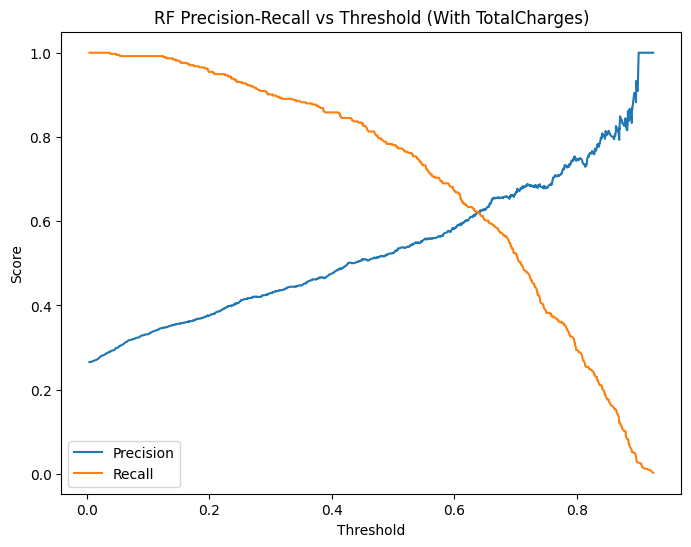

Best Threshold (RF With TotalCharges): 0.5373010402009014
Best F1 Score: 0.6358511837655016
Random Forest (With TotalCharges)

Accuracy: 0.7707594038325053
Precision: 0.5497076023391813
Recall: 0.7540106951871658
F1 Score: 0.6358511837655016
ROC-AUC: 0.8441899816580124

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1035
           1       0.55      0.75      0.64       374

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.77      0.78      1409



In [28]:
y_prob_with = rf_with.predict_proba(X_test_with)[:,1]

from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

precision_with, recall_with, thresholds_with = precision_recall_curve(
    y_test_with,
    y_prob_with
)

plt.figure(figsize=(8,6))
plt.plot(thresholds_with, precision_with[:-1], label="Precision")
plt.plot(thresholds_with, recall_with[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("RF Precision-Recall vs Threshold (With TotalCharges)")
plt.legend()
plt.show()

f1_scores_with = 2 * (precision_with * recall_with) / (precision_with + recall_with)
f1_scores_with = np.nan_to_num(f1_scores_with)

best_index_with = np.argmax(f1_scores_with)
best_threshold_with = thresholds_with[best_index_with]

print("Best Threshold (RF With TotalCharges):", best_threshold_with)
print("Best F1 Score:", f1_scores_with[best_index_with])

y_pred_with = (y_prob_with >= best_threshold_with).astype(int)


print("Random Forest (With TotalCharges)\n")

print("Accuracy:", accuracy_score(y_test_with, y_pred_with))
print("Precision:", precision_score(y_test_with, y_pred_with))
print("Recall:", recall_score(y_test_with, y_pred_with))
print("F1 Score:", f1_score(y_test_with, y_pred_with))
print("ROC-AUC:", roc_auc_score(y_test_with, y_prob_with))

print("\nClassification Report:\n")
print(classification_report(y_test_with, y_pred_with))

# Train Random Forest (WITHOUT TotalCharges)

In [29]:
rf_without = RandomForestClassifier(
    n_estimators=500,
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    class_weight="balanced"
)

rf_without.fit(X_train_without, y_train_without.values.ravel())


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",500
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

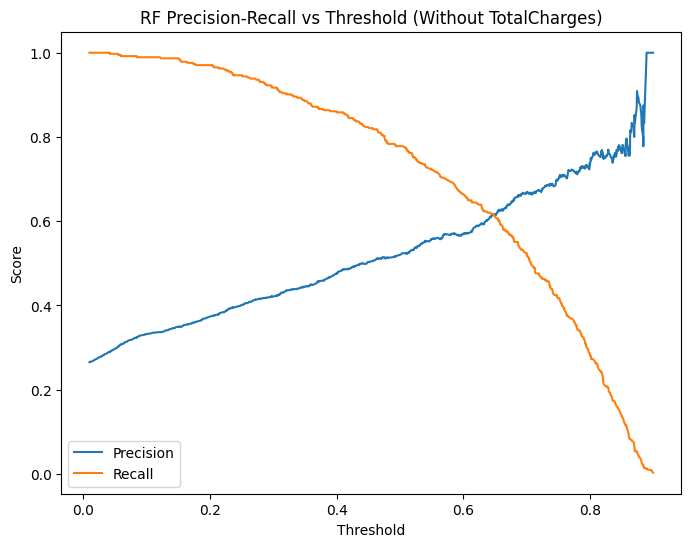

Best Threshold (RF Without TotalCharges): 0.5392875825251687
Best F1 Score: 0.6307339449541284
Random Forest (Without TotalCharges)

Accuracy: 0.7714691270404542
Precision: 0.5522088353413654
Recall: 0.7352941176470589
F1 Score: 0.6307339449541285
ROC-AUC: 0.8419501924617014


In [30]:
y_prob_without = rf_without.predict_proba(X_test_without)[:,1]

from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

precision_without, recall_without, thresholds_without = precision_recall_curve(
    y_test_without,
    y_prob_without
)

plt.figure(figsize=(8,6))
plt.plot(thresholds_without, precision_without[:-1], label="Precision")
plt.plot(thresholds_without, recall_without[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("RF Precision-Recall vs Threshold (Without TotalCharges)")
plt.legend()
plt.show()

f1_scores_without = 2 * (precision_without * recall_without) / (precision_without + recall_without)
f1_scores_without = np.nan_to_num(f1_scores_without)

best_index_without = np.argmax(f1_scores_without)
best_threshold_without = thresholds_without[best_index_without]

print("Best Threshold (RF Without TotalCharges):", best_threshold_without)
print("Best F1 Score:", f1_scores_without[best_index_without])

y_pred_without = (y_prob_without >= best_threshold_without).astype(int)


print("Random Forest (Without TotalCharges)\n")

print("Accuracy:", accuracy_score(y_test_without, y_pred_without))
print("Precision:", precision_score(y_test_without, y_pred_without))
print("Recall:", recall_score(y_test_without, y_pred_without))
print("F1 Score:", f1_score(y_test_without, y_pred_without))
print("ROC-AUC:", roc_auc_score(y_test_without, y_prob_without))


In [31]:
comparison_rf = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"],
    "With_TotalCharges": [
        accuracy_score(y_test_with, y_pred_with),
        precision_score(y_test_with, y_pred_with),
        recall_score(y_test_with, y_pred_with),
        f1_score(y_test_with, y_pred_with),
        roc_auc_score(y_test_with, y_prob_with)
    ],
    "Without_TotalCharges": [
        accuracy_score(y_test_without, y_pred_without),
        precision_score(y_test_without, y_pred_without),
        recall_score(y_test_without, y_pred_without),
        f1_score(y_test_without, y_pred_without),
        roc_auc_score(y_test_without, y_prob_without)
    ]
})

comparison_rf

,Metric,With_TotalCharges,Without_TotalCharges
0,Accuracy,0.770759,0.771469
1,Precision,0.549708,0.552209
2,Recall,0.754011,0.735294
3,F1 Score,0.635851,0.630734
4,ROC-AUC,0.844190,0.841950


Accuracy is misleading in imbalanced datasets.

radeoff Analysis

As depth decreased:

Recall ↑

Precision ↓

Accuracy ↓ slightly

ROC-AUC ↑ slightly

This is textbook bias-variance behavior.

Shallower trees:

Less overfitting

Better generalization

Catch more churners

Random Forest is now:

✔ Much better at catching churners

✔ Slightly better ROC

❌ Lower accuracy

Your tuned Random Forest (max_depth=8 or 10). Is now stronger for churn use-case. Even though accuracy dropped slightly. Accuracy is misleading in imbalanced datasets.

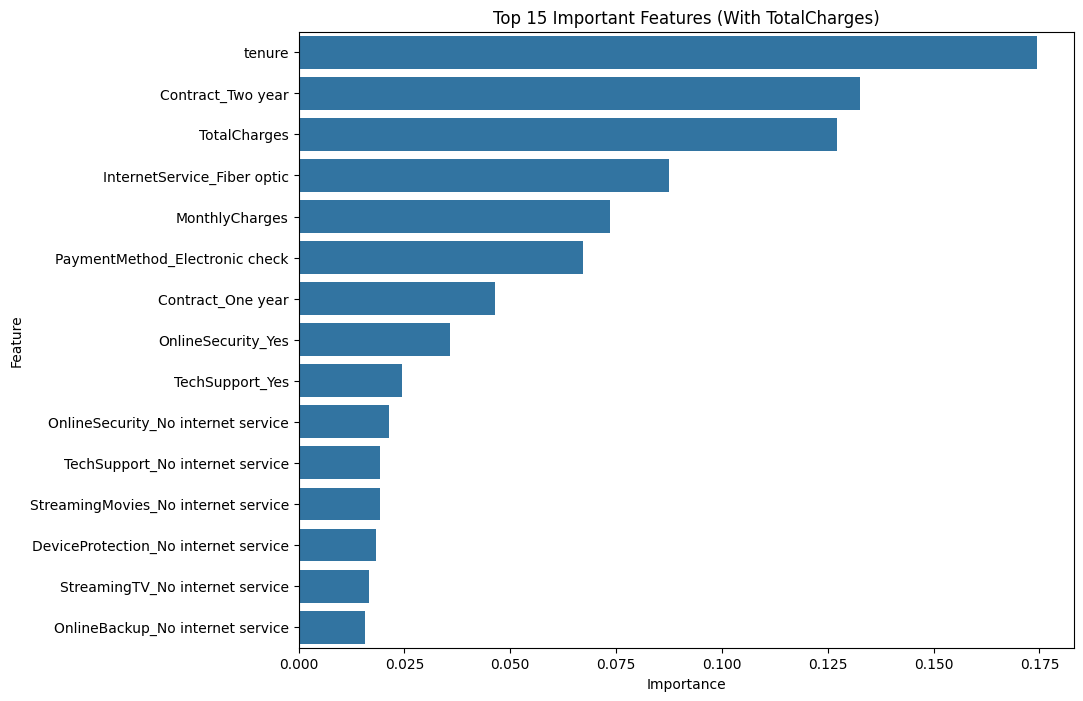

,Feature,Importance
1,tenure,0.174323
25,Contract_Two year,0.132569
3,TotalCharges,0.127207
10,InternetService_Fiber optic,0.087382
2,MonthlyCharges,0.073633
28,PaymentMethod_Electronic check,0.067142
24,Contract_One year,0.046337
13,OnlineSecurity_Yes,0.035806
19,TechSupport_Yes,0.024329
12,OnlineSecurity_No internet service,0.021361


In [32]:
feature_importance = pd.DataFrame({
    "Feature": X_train_with.columns,
    "Importance": rf_with.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x="Importance", y="Feature", data=feature_importance.head(15))
plt.title("Top 15 Important Features (With TotalCharges)")
plt.show()

feature_importance.head(15)
